Step 0: Imports libraries and data set

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list


Package                   Version
------------------------- --------------
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.59.0
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna                      3.10
ipykernel     

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Settings
-add style sheets for seaborned plots
-expands the number of columns displayed

In [6]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [7]:
df = pd.read_parquet('flights-10k.parquet')

Step 1 : Data understanding

1. Dataframe shape
2. head and tail
3. dtypes
4. describe


In [8]:
df.head() #read the first 5 rows of the table


,FL_DATE,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE
0,2006-01-01,9.083333,5,12.483334,19,350,2475
1,2006-01-02,11.783334,167,15.766666,216,343,2475
2,2006-01-03,8.883333,-7,12.133333,-2,344,2475
3,2006-01-04,8.916667,-5,11.950000,-13,331,2475
4,2006-01-05,8.950000,-3,11.883333,-17,321,2475


In [9]:
df.isnull().sum() #checking for empty data points


FL_DATE      0
DEP_TIME     0
DEP_DELAY    0
ARR_TIME     0
ARR_DELAY    0
AIR_TIME     0
DISTANCE     0
dtype: int64

In [10]:
df.shape

(10001, 7)

From the data shape, it can be deduced that the table has 10000 rows and 7 columns

In [11]:
df.dtypes

FL_DATE       object
DEP_TIME     float32
DEP_DELAY      int16
ARR_TIME     float32
ARR_DELAY      int16
AIR_TIME       int16
DISTANCE       int16
dtype: object

In [12]:
df.describe()


,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,13.650060,8.167983,15.266925,5.897310,192.493951,1496.214479
std,4.898299,33.439309,5.404211,36.866287,103.837838,894.595480
min,0.000000,-25.000000,0.000000,-57.000000,27.000000,175.000000
25%,9.233334,-4.000000,11.400000,-11.000000,111.000000,733.000000
50%,13.650000,-2.000000,15.983334,-3.000000,165.000000,1205.000000
75%,17.600000,5.000000,19.900000,10.000000,280.000000,2446.000000
max,23.983334,949.000000,23.983334,923.000000,590.000000,4244.000000


Step 2 : Data Preparation

1. Dropping irrelevant columns and rows
2. Converting to the right data types
3. Identifying duplicated columns
4. Renaming Columns
5. Feature Creation

In [13]:
df.columns

Index(['FL_DATE', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'AIR_TIME',
       'DISTANCE'],
      dtype='object')

In [14]:
#convert column to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [15]:
df.dtypes

FL_DATE      datetime64[ns]
DEP_TIME            float32
DEP_DELAY             int16
ARR_TIME            float32
ARR_DELAY             int16
AIR_TIME              int16
DISTANCE              int16
dtype: object

In [16]:
# Step 1: Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Step 2: Convert decimal hours to timedelta (helper function)
def decimal_to_time(x):
    hour = int(x)
    minute = int((x - hour) * 60)
    return pd.Timedelta(hours=hour, minutes=minute)

# Step 3: Create datetime columns
df['DEP_DATETIME'] = df['FL_DATE'] + df['DEP_TIME'].apply(decimal_to_time)
df['ARR_DATETIME'] = df['FL_DATE'] + df['ARR_TIME'].apply(decimal_to_time)

In [17]:
df.head()

,FL_DATE,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DEP_DATETIME,ARR_DATETIME
0,2006-01-01,9.083333,5,12.483334,19,350,2475,2006-01-01 09:04:00,2006-01-01 12:29:00
1,2006-01-02,11.783334,167,15.766666,216,343,2475,2006-01-02 11:47:00,2006-01-02 15:45:00
2,2006-01-03,8.883333,-7,12.133333,-2,344,2475,2006-01-03 08:52:00,2006-01-03 12:07:00
3,2006-01-04,8.916667,-5,11.950000,-13,331,2475,2006-01-04 08:55:00,2006-01-04 11:56:00
4,2006-01-05,8.950000,-3,11.883333,-17,321,2475,2006-01-05 08:56:00,2006-01-05 11:52:00


In [18]:
df.describe()

,FL_DATE,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DEP_DATETIME,ARR_DATETIME
count,10001,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001,10001
mean,2006-01-15 21:42:38.264173440,13.650060,8.167983,15.266925,5.897310,192.493951,1496.214479,2006-01-16 11:21:10.870913024,2006-01-16 12:58:12.016798336
min,2006-01-01 00:00:00,0.000000,-25.000000,0.000000,-57.000000,27.000000,175.000000,2006-01-01 00:00:00,2006-01-01 00:02:00
25%,2006-01-08 00:00:00,9.233334,-4.000000,11.400000,-11.000000,111.000000,733.000000,2006-01-08 15:57:00,2006-01-08 17:45:00
50%,2006-01-16 00:00:00,13.650000,-2.000000,15.983334,-3.000000,165.000000,1205.000000,2006-01-16 11:40:00,2006-01-16 14:07:00
75%,2006-01-24 00:00:00,17.600000,5.000000,19.900000,10.000000,280.000000,2446.000000,2006-01-24 08:56:00,2006-01-24 11:11:00
max,2006-01-31 00:00:00,23.983334,949.000000,23.983334,923.000000,590.000000,4244.000000,2006-01-31 23:57:00,2006-01-31 23:49:00
std,NaN,4.898299,33.439309,5.404211,36.866287,103.837838,894.595480,NaN,NaN


In [19]:
df.dtypes


FL_DATE         datetime64[ns]
DEP_TIME               float32
DEP_DELAY                int16
ARR_TIME               float32
ARR_DELAY                int16
AIR_TIME                 int16
DISTANCE                 int16
DEP_DATETIME    datetime64[ns]
ARR_DATETIME    datetime64[ns]
dtype: object

In [20]:
df.drop(['DEP_TIME', 'ARR_TIME'], axis=1, inplace=True)


In [21]:
print(df.columns.tolist())



['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME']


In [22]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FL_DATE       10001 non-null  datetime64[ns]
 1   DEP_DELAY     10001 non-null  int16         
 2   ARR_DELAY     10001 non-null  int16         
 3   AIR_TIME      10001 non-null  int16         
 4   DISTANCE      10001 non-null  int16         
 5   DEP_DATETIME  10001 non-null  datetime64[ns]
 6   ARR_DATETIME  10001 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int16(4)
memory usage: 312.7 KB


,FL_DATE,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DEP_DATETIME,ARR_DATETIME
count,10001,10001.000000,10001.000000,10001.000000,10001.000000,10001,10001
mean,2006-01-15 21:42:38.264173440,8.167983,5.897310,192.493951,1496.214479,2006-01-16 11:21:10.870913024,2006-01-16 12:58:12.016798336
min,2006-01-01 00:00:00,-25.000000,-57.000000,27.000000,175.000000,2006-01-01 00:00:00,2006-01-01 00:02:00
25%,2006-01-08 00:00:00,-4.000000,-11.000000,111.000000,733.000000,2006-01-08 15:57:00,2006-01-08 17:45:00
50%,2006-01-16 00:00:00,-2.000000,-3.000000,165.000000,1205.000000,2006-01-16 11:40:00,2006-01-16 14:07:00
75%,2006-01-24 00:00:00,5.000000,10.000000,280.000000,2446.000000,2006-01-24 08:56:00,2006-01-24 11:11:00
max,2006-01-31 00:00:00,949.000000,923.000000,590.000000,4244.000000,2006-01-31 23:57:00,2006-01-31 23:49:00
std,NaN,33.439309,36.866287,103.837838,894.595480,NaN,NaN


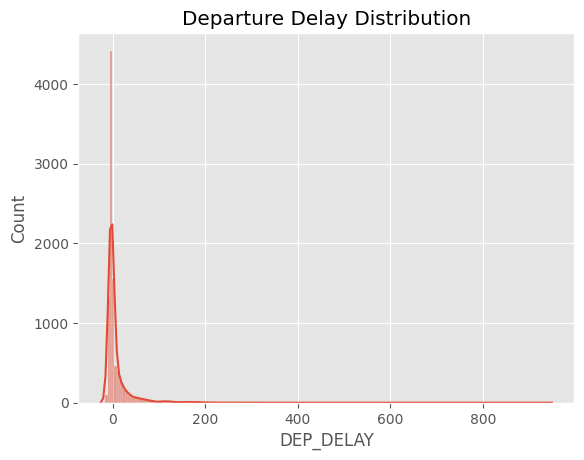

In [23]:
sns.histplot(df['DEP_DELAY'], kde=True)
plt.title('Departure Delay Distribution')
plt.show()


Create histogram plot

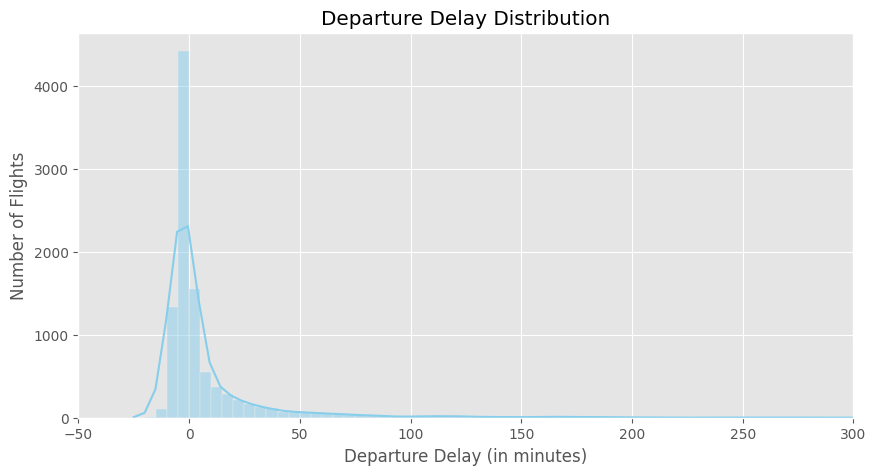

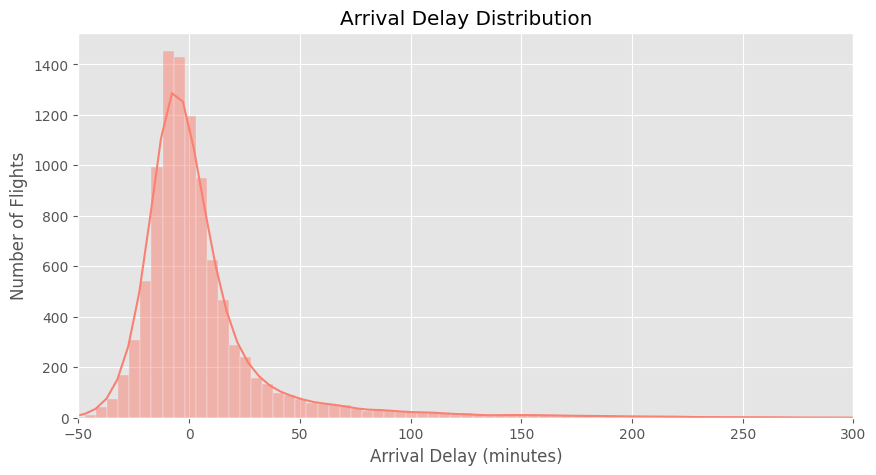

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#Departure Delay Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['DEP_DELAY'], kde=True, binwidth=5, color='skyblue')
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (in minutes)')
plt.ylabel('Number of Flights')
plt.xlim(-50, 300)
plt.grid(True)
plt.show()

#Arrival Delay Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['ARR_DELAY'], kde=True, binwidth=5, color= 'salmon')
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.xlim(-50, 300)
plt.grid(True)
plt.show()




In [25]:
print(df.columns.tolist())

['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME']


In [26]:
#df.drop(columns=['HOUR', 'MONTH', 'DAY'])


In [27]:
print(df.columns.tolist())


['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME']


['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME']


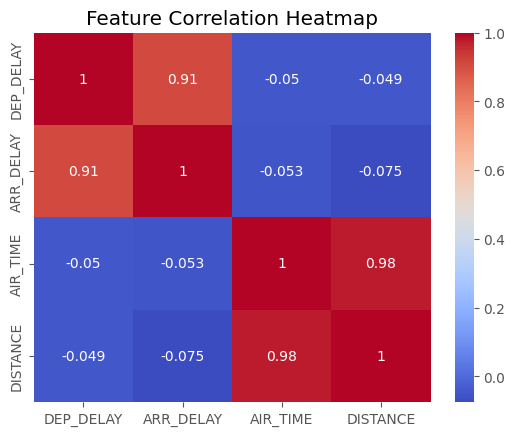

In [28]:
print(df.columns.tolist())
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [29]:
print(df.columns.tolist())

['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME']


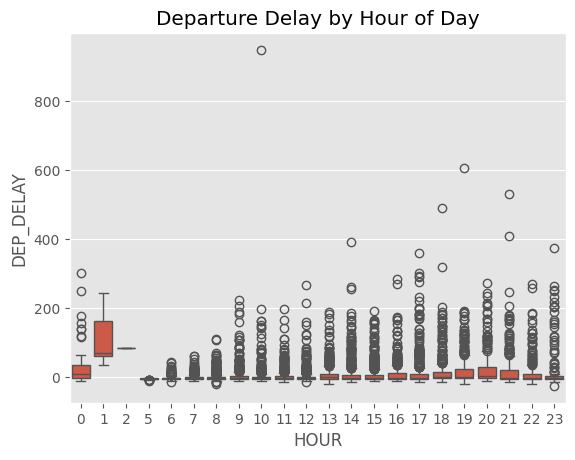

['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME', 'HOUR']


,FL_DATE,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DEP_DATETIME,ARR_DATETIME,HOUR
0,2006-01-01,5,19,350,2475,2006-01-01 09:04:00,2006-01-01 12:29:00,9
1,2006-01-02,167,216,343,2475,2006-01-02 11:47:00,2006-01-02 15:45:00,11
2,2006-01-03,-7,-2,344,2475,2006-01-03 08:52:00,2006-01-03 12:07:00,8
3,2006-01-04,-5,-13,331,2475,2006-01-04 08:55:00,2006-01-04 11:56:00,8
4,2006-01-05,-3,-17,321,2475,2006-01-05 08:56:00,2006-01-05 11:52:00,8


In [30]:
df['HOUR'] = df['DEP_DATETIME'].dt.hour

sns.boxplot(x='HOUR', y='DEP_DELAY', data=df)
plt.title('Departure Delay by Hour of Day')
plt.show()

print(df.columns.tolist())
df.head()


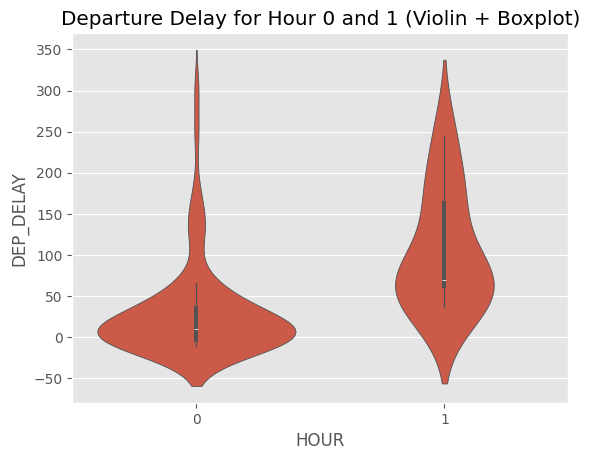

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only hours 0 and 1
filtered_df = df[df['HOUR'].isin([0, 1])]

# Plot violin with box inside
sns.violinplot(x='HOUR', y='DEP_DELAY', data=filtered_df, inner="box")
plt.title('Departure Delay for Hour 0 and 1 (Violin + Boxplot)')
plt.show()



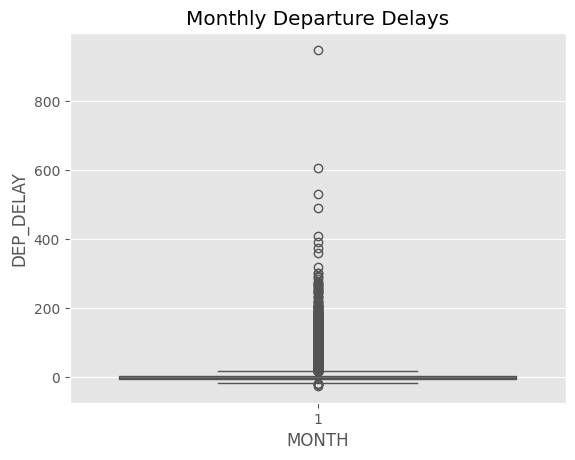

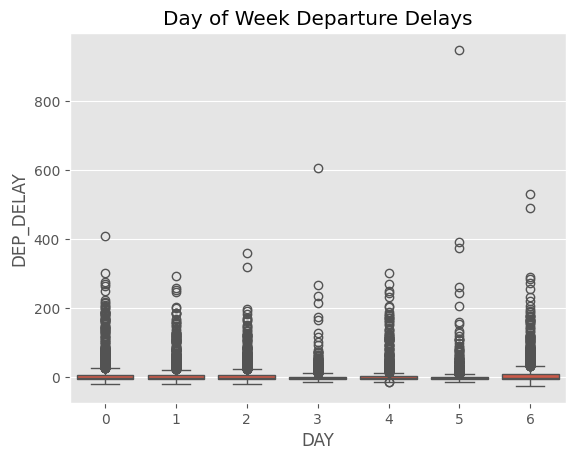

['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DEP_DATETIME', 'ARR_DATETIME', 'HOUR', 'MONTH', 'DAY']


In [32]:
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY'] = df['FL_DATE'].dt.dayofweek  # 0 = Monday

sns.boxplot(x='MONTH', y='DEP_DELAY', data=df)
plt.title('Monthly Departure Delays')
plt.show()

sns.boxplot(x='DAY', y='DEP_DELAY', data=df)
plt.title('Day of Week Departure Delays')
plt.show()

print(df.columns.tolist())

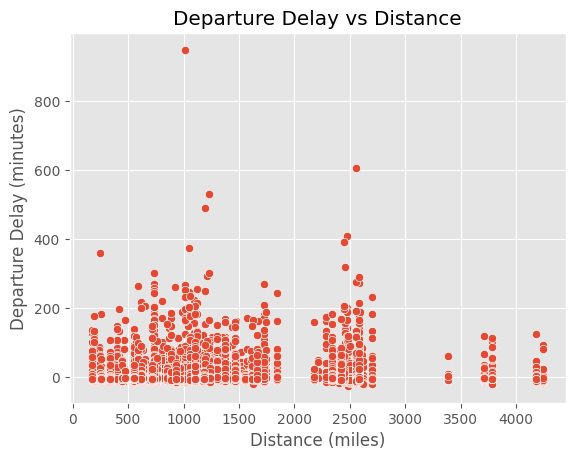

Text(28.625000000000007, 0.5, 'Departure Delay')

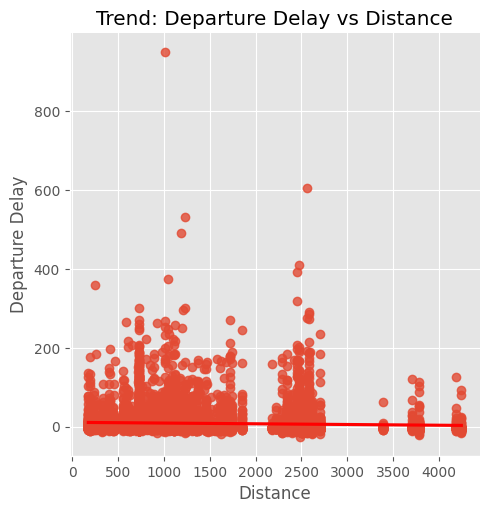

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='DISTANCE', y='DEP_DELAY', data=df)
plt.title('Departure Delay vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()

sns.lmplot(x='DISTANCE', y='DEP_DELAY', data=df, line_kws={"color": "red"})
plt.title('Trend: Departure Delay vs Distance')
plt.xlabel('Distance')
plt.ylabel('Departure Delay')



C:\Users\USER\AppData\Local\Temp\ipykernel_31572\1634455207.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DISTANCE_BIN')['DEP_DELAY'].mean().plot(kind='bar')


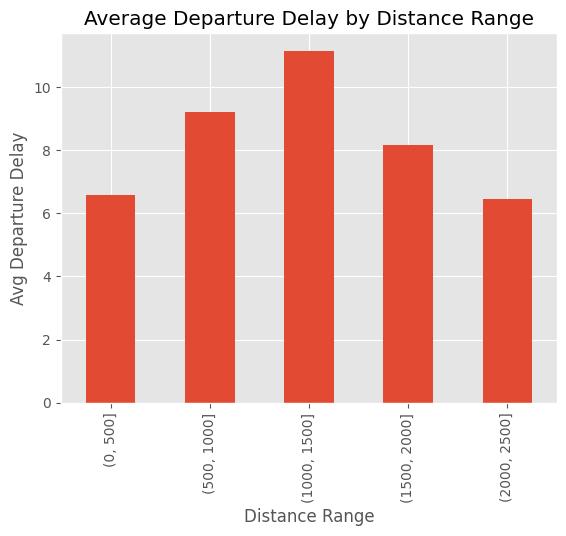

In [34]:
df['DISTANCE_BIN'] = pd.cut(df['DISTANCE'], bins=[0, 500, 1000, 1500, 2000, 2500])
df.groupby('DISTANCE_BIN')['DEP_DELAY'].mean().plot(kind='bar')
plt.title('Average Departure Delay by Distance Range')
plt.ylabel('Avg Departure Delay')
plt.xlabel('Distance Range')
plt.grid(True)
plt.show()


Data Insights

1. 

In [35]:
{
 "cells": [],
 "metadata": {},
 "nbformat": 4,
 "nbformat_minor": 5
}


{'cells': [], 'metadata': {}, 'nbformat': 4, 'nbformat_minor': 5}